# Project 2 - Analyzing the NYC Subway Dataset
'''
Created by Laura Uzcategui 
Date : 30 Sept 2015 
'''

# Subway Ridership 

Subway ridership consists of all passengers (other than NYC Transit employees) who enter the subway system, including passengers who transfer from buses.  Ridership does not include passengers who exit the subway or passengers who transfer from other subway lines, with the exception of out-of-system transfers; e.g., between the Lexington Av/63 St F subwaystation and the Lexington Avenue N subwayQ subwayR subway/59 St4 subway5 subway6 subwaystation, where customers use their MetroCard to make the transfer.

This project has the purpose to analyze and investigate if more people ride the Subway when is raining vs when it is not raining. [1]

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

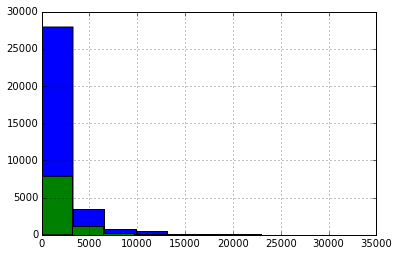

In [22]:
# making available graphs inline
%pylab inline
# importing pandas for manipulation of data
import pandas as pd
# importing matplotlib for printing the plot
import matplotlib.pyplot as plt

# Importing scipy for working with Mann-Whitney U-Test
import scipy
import scipy.stats

#Importing numpy and statsmodels for Linear Regression 
import numpy as np
import statsmodels.api as sm
import sys

# Loading the path of our NYC subway dataset
filename = './turnstile_weather_v2.csv'

# Let's read our dataset
weather_data = pd.read_csv(filename)


def entries_histogram(turnstile_weather):
      
    plt.figure()
    #Blue Bars - NO Rain
    turnstile_weather[turnstile_weather.rain==0].ENTRIESn_hourly.hist() # your code here to plot a historgram for hourly entries when it is not raining (GREEN)
    #Green Bars - Raining
    turnstile_weather[turnstile_weather.rain==1].ENTRIESn_hourly.hist() # your code here to plot a historgram for hourly entries when it is raining (BLUE)
    plt.title = "Entries when Raining vs When is not raining"
    return plt

entries_histogram(weather_data).show

Both Histograms does not seems to follow a Normal Distribution. 

##Section 1. Statistical Test 

####1.1 Which statistical test did you use to Analyze the NYC Subway data?
 
  The statistical test used for Analyze NYC Subway data is Mann Whitney U Test. 
 
#### Did you use a one-tail or a two-tail P Value ? 
  
   The P value used is Two Tail Test. 
  

#### What is the null hypothesis ? 

The appropiate hypothesis for this task will be the following: 
* H0 ( Null hypothesis) : $ P( Rain  >  No Rain ) \leqq 0.5 $ 
Probability that Riderships with Rain is larger 

* H1 ( Alternative hypothises) : $ P( Rain  >  No Rain )  \gt 0.5 $ 

#### What is your p-critical value? 

 The p-critical value will be 0.025 since is two-sided Test.
 
#### 1.2 Why is this statistical test applicable to the dataset? 
  
 Based on the visualisation for the Histograms, the distributions do not seems to be Normal and based on the assumption We draw the data from unknown distributions We could apply Mann-Whitney U Test.
 

In [23]:
def mann_whitney_plus_means(turnstile_weather):
  
    entries_rain = turnstile_weather[turnstile_weather.rain==1].ENTRIESn_hourly
    entries_norain = turnstile_weather[turnstile_weather.rain==0].ENTRIESn_hourly

    with_rain_mean = np.mean(entries_rain)
    without_rain_mean = np.mean(entries_norain)
    U, p = scipy.stats.mannwhitneyu(entries_rain,entries_norain)
    
    return with_rain_mean, without_rain_mean, U, p*2 # leave this line for the grader


In [24]:
print mann_whitney_plus_means(weather_data)

(2028.1960354720918, 1845.5394386644084, 153635120.5, 5.4821391424874991e-06)


#### 1.3 What results did you get from this statistical test ? 
 
 A Mann-Whitney  U Test indicated that Ridership when is Raining (Mean = 2028.1960354720918) was statiscally significant different than Ridership when is not Raining (Mean = 1845.5394386644084), U =153635120.5, p=5.48213e-06 
 
####1.4 What is the significance and interpretation of these results?
 We reject the null hypothesis since the results are statically significant different. 

##Section 2. Linear Regression.

####2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
    OLS using Statsmodels or Scikit Learn
    Gradient descent using Scikit Learn
    Or something different?
    
####2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?
####2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  
####2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?
####2.5 What is your model’s R2 (coefficients of determination) value?
####2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?

In [32]:

def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.

    This can be the same code as in the lesson #3 exercise.
    """

    

    features = sm.add_constant(features)
    
    model = sm.OLS(values,features)
    results = model.fit()
    intercept = results.params[0]
    parameters = results.params[1:]
    
    return intercept, parameters

def predictions(dataframe):
    features = dataframe[['meantempi','hour','meanwspdi','rain','precipi','fog','meanpressurei']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)

    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)

    predictions = intercept + np.dot(features, params)
    return predictions


In [45]:
pred =  predictions(weather_data)
print pred.shape
print weather_data['ENTRIESn_hourly'].shape

(42649,)
(42649,)


In [46]:
def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    
    # your code here
    mean_p = np.mean(data) # mean of observations

    sse = np.sum((data-predictions)**2) #sum squared error
    sst = np.sum((data-mean_p)**2) # total sum of squares

    r_squared = 1 - ( sse / sst )
    print data.shape
    print predictions.shape
    
    return r_squared

In [47]:
dataPoints = weather_data['ENTRIESn_hourly']
print compute_r_squared(dataPoints,pred)

(42649,)
(42649,)
0.462273272322
